# HW 4

Dennis Wang

MA 707 - Machine Learning

Load a data set and choose some variables as features and a binary categorical variable as a target, then 

1. compute the correlations between the features and the target. 

2. Now choose a supervised learning method that has a built-in notion of feature importance (you can Google to find out which ones do) and split your data into training/test and fit your model on the training data then report the built-in feature importances. 

3. Use your test data to compute permutation feature importances and report these. 

4. Compute and report the confusion matrix, sensitivity, specificity, F1 score, AUC, and plot the ROC curve.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
cancer = load_breast_cancer()

In [10]:
df = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']], 
                  columns = np.concatenate((cancer['feature_names'], ['target']), axis = None))

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

> Impute correlations between features and the target

In [13]:
correlation_coefficients = np.corrcoef( df, rowvar=False )
correlation_coefficients[-1:]

array([[-0.73002851, -0.4151853 , -0.74263553, -0.70898384, -0.35855997,
        -0.59653368, -0.69635971, -0.77661384, -0.33049855,  0.0128376 ,
        -0.56713382,  0.00830333, -0.5561407 , -0.54823594,  0.06701601,
        -0.29299924, -0.25372977, -0.40804233,  0.00652176, -0.07797242,
        -0.77645378, -0.45690282, -0.78291414, -0.73382503, -0.42146486,
        -0.59099824, -0.65961021, -0.79356602, -0.41629431, -0.32387219,
         1.        ]])

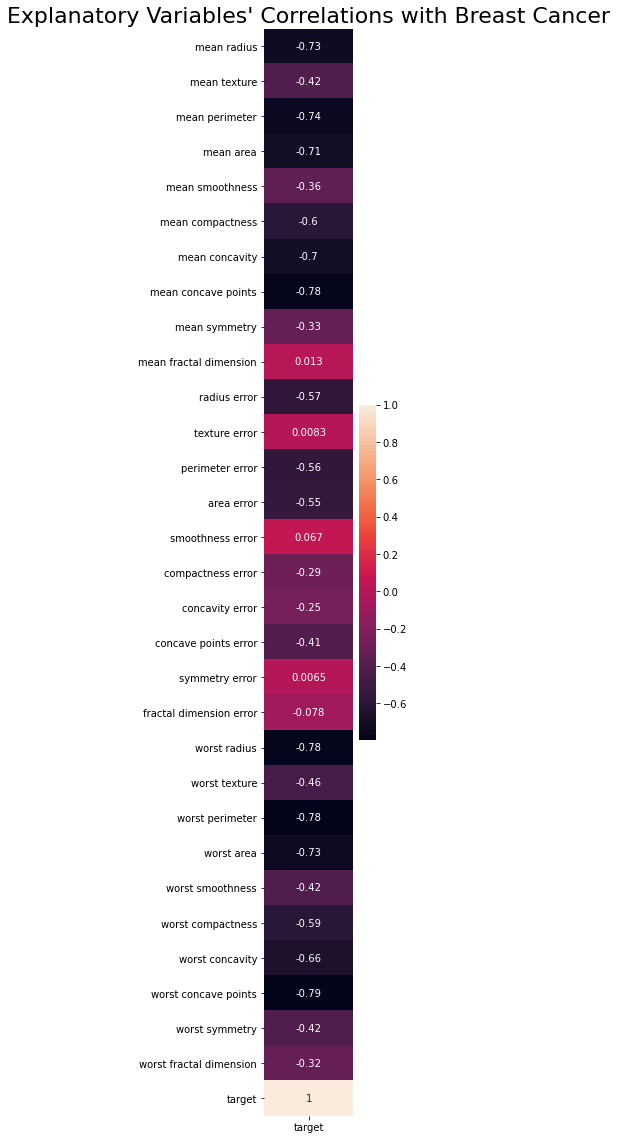

In [14]:
plt.figure(figsize=(2,20))
sns.heatmap(np.transpose(correlation_coefficients[-1:]), 
            annot=True, 
            annot_kws ={"rotation" : "0"} ) 
plt.yticks( np.arange(31)+0.5, df.columns[0:31], rotation = 0 )
plt.xticks( np.arange(1)+0.5, df.columns[-1:], rotation = 0 )
plt.title( label="Explanatory Variables' Correlations with Breast Cancer", loc="center", fontsize=22)
plt.show()

Variables worth checking out: (Correlations over 0.30)

In [15]:
df.columns[(abs(correlation_coefficients[-1:]) > 0.30)[0]]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error',
       'perimeter error', 'area error', 'concave points error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'target'],
      dtype='object')

> Now choose a supervised learning method that has a built-in notion of feature importance (you can Google to find out which ones do) and split your data into training/test and fit your model on the training data then report the built-in feature importances.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [57]:
X = df.iloc[:,0:30]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)

In [59]:
print(rfc.feature_importances_)

[0.06276312 0.01756786 0.05843288 0.01222937 0.00597151 0.01342606
 0.0535523  0.14687008 0.00274013 0.00574639 0.01806834 0.00531874
 0.02174676 0.03917133 0.00544662 0.00381473 0.00448686 0.00477654
 0.00441175 0.0054357  0.0654377  0.01977993 0.0925212  0.10553336
 0.01121741 0.02208898 0.04894366 0.12749091 0.00948367 0.00552609]


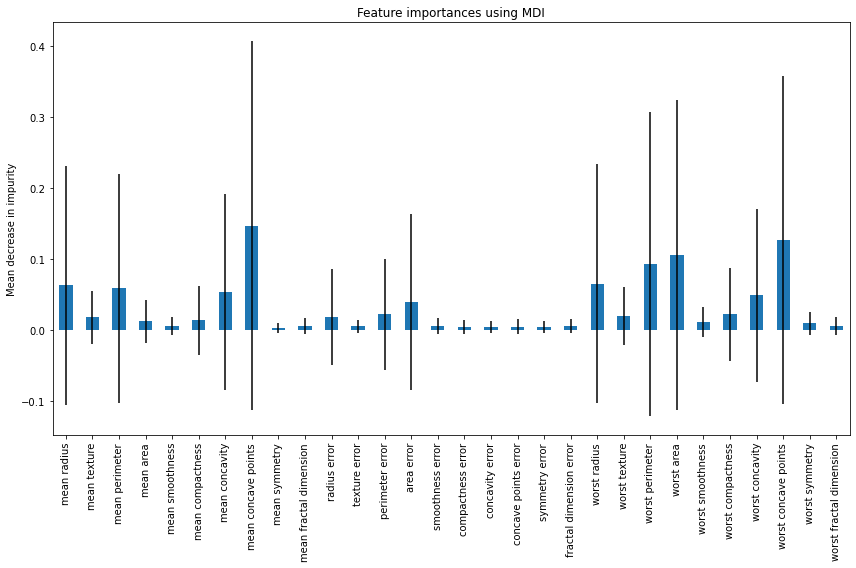

In [71]:
rfc_importances = pd.Series(rfc.feature_importances_, index=df.iloc[:,0:30].columns)
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

fig, ax = plt.subplots(figsize=(12,8))
rfc_importances.plot.bar(yerr=std,ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Yeah I don't know why the standard deviations are so large.

> Use your test data to compute permutation feature importances and report these.

In [56]:
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [63]:
results = permutation_importance(rfc, X_test, y_test, n_repeats = 10)

In [65]:
forest_importances = pd.Series(results.importances_mean, index=df.iloc[:,0:30].columns)

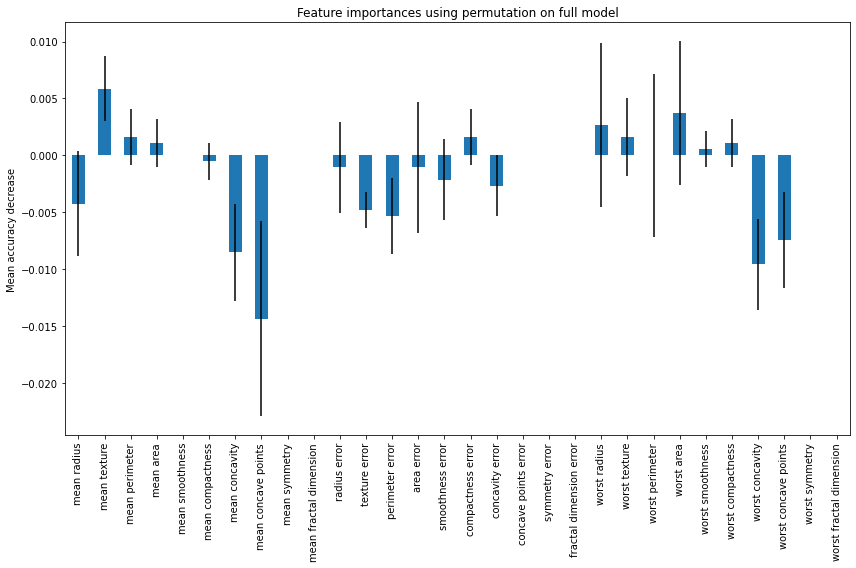

In [68]:
fig, ax = plt.subplots(figsize=(12,8))
forest_importances.plot.bar(yerr=results.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Maybe it's just the data? Really no idea why the standard deviations are so large. Also the fact that feature importances can be negative.

> Compute and report the confusion matrix, sensitivity, specificity, F1 score, AUC, and plot the ROC curve.

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, plot_roc_curve

In [75]:
print(confusion_matrix(y_test, rfc_predictions))
print('\n')
print(classification_report(y_test, rfc_predictions))

[[ 61   6]
 [  3 118]]


              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        67
         1.0       0.95      0.98      0.96       121

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



In [77]:
print(f'F1 Score: {f1_score(y_test, rfc_predictions)}')
print('\n')
print(f'AUC: {roc_auc_score(y_test, rfc_predictions)}')

F1 Score: 0.963265306122449


AUC: 0.9428271863821388


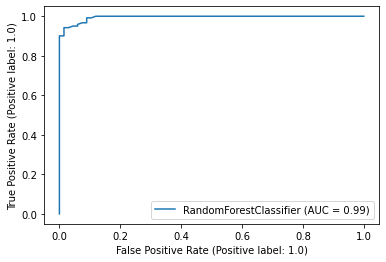

In [78]:
plot_roc_curve(rfc, X_test, y_test)

Discuss the findings from your Python part of this HW---specifically, 

1. Are the important features ones you might expect to be important in your data and classification problem (based on your intuition about what the variables mean)? 

To be honest I'm not sure what many of the features mean. But it seems that most of "important" features are ones that relate to the size of the tumor rather than the texture and firmness(?).

2. How did the feature importances compare when doing simple correlations, built-in feature importance, and permutation importance (did you find anything especially surprising/interesting)? 

The build-in feature importance seems to agree with the correlation matrix for the most part, but not at all with the permutation importance. Many of the "most importance" built-in features end up being the least useful in the permutation importance features.

3. Based on your model evaluations (the various scores you computed at the end) do you think this model is working well? (It's hard to really answer this question, so just tell me any signs you notice that it is doing well or that it is struggling, and possibly in what ways.) 

All of the metrics seem very good, so yes.

4. Tell me one specific, concrete thing that can be learned from your ROC curve plot.

In the sorted ranking classifier, if you randomly grab one of the positive points and one of the negative points, there is a 98% chance the positive point would be above the negative point. 